In [23]:
%matplotlib inline
from string import ascii_letters
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Scania Trucks APS Failure Dataset

## Import Dataset

In [24]:
dataset = pd.read_csv("aps_failure_set.csv")

In [25]:
dataset.head(-5)

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,neg,76698,na,2130706438,280,0,0,0,0,0,...,1240520,493384,721044,469792,339156,157956,73224,0,0,0
1,neg,33058,na,0,na,0,0,0,0,0,...,421400,178064,293306,245416,133654,81140,97576,1500,0,0
2,neg,41040,na,228,100,0,0,0,0,0,...,277378,159812,423992,409564,320746,158022,95128,514,0,0
3,neg,12,0,70,66,0,10,0,0,0,...,240,46,58,44,10,0,0,0,4,32
4,neg,60874,na,1368,458,0,0,0,0,0,...,622012,229790,405298,347188,286954,311560,433954,1218,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59990,neg,81354,na,2130706432,156,0,0,0,0,0,...,627610,376028,931828,1035236,674626,161266,3284,0,0,0
59991,neg,39308,na,452,374,0,0,0,0,0,...,312426,161694,323438,292350,250112,157636,234932,9506,0,0
59992,neg,14,0,2,2,0,0,0,0,0,...,132,44,80,52,54,0,0,0,0,0
59993,neg,0,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [26]:
dataset.shape

(60000, 171)

In [27]:
dataset.info(1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Data columns (total 171 columns):
 #    Column  Dtype 
---   ------  ----- 
 0    class   object
 1    aa_000  int64 
 2    ab_000  object
 3    ac_000  object
 4    ad_000  object
 5    ae_000  object
 6    af_000  object
 7    ag_000  object
 8    ag_001  object
 9    ag_002  object
 10   ag_003  object
 11   ag_004  object
 12   ag_005  object
 13   ag_006  object
 14   ag_007  object
 15   ag_008  object
 16   ag_009  object
 17   ah_000  object
 18   ai_000  object
 19   aj_000  object
 20   ak_000  object
 21   al_000  object
 22   am_0    object
 23   an_000  object
 24   ao_000  object
 25   ap_000  object
 26   aq_000  object
 27   ar_000  object
 28   as_000  object
 29   at_000  object
 30   au_000  object
 31   av_000  object
 32   ax_000  object
 33   ay_000  object
 34   ay_001  object
 35   ay_002  object
 36   ay_003  object
 37   ay_004  object
 38   ay_005  object
 39   ay_006  object
 40   ay

In [28]:
dataset.isnull().sum()

class     0
aa_000    0
ab_000    0
ac_000    0
ad_000    0
         ..
ee_007    0
ee_008    0
ee_009    0
ef_000    0
eg_000    0
Length: 171, dtype: int64

In [29]:
dataset["class"].unique()

array(['neg', 'pos'], dtype=object)

In [30]:
dataset["ad_000"].unique()

array(['280', 'na', '100', ..., '5286', '3608', '194868'], dtype=object)

In [31]:
# Use this cell if you want to check all unique values for all fetures

# column_list = dataset.columns.values.tolist()
# for column_name in column_list:
#      print(dataset[column_name].unique())

### Clean Data

In [32]:
miss_val_formats = ["n.a.", "?", "NA", "n/a", "na", "--"]
new_dataset = pd.read_csv("aps_failure_set.csv", na_values = miss_val_formats)

###### Change string values to integer values for Dependent cloumn
We need to use numerical values for ML so change the target values 


In [33]:
new_dataset['class'].replace('neg', 0, inplace = True)
new_dataset['class'].replace('pos', 1,  inplace = True)

In [34]:
new_dataset.head(-5)

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,0,76698,NaN,2.130706e+09,280.0,0.0,0.0,0.0,0.0,0.0,...,1240520.0,493384.0,721044.0,469792.0,339156.0,157956.0,73224.0,0.0,0.0,0.0
1,0,33058,NaN,0.000000e+00,NaN,0.0,0.0,0.0,0.0,0.0,...,421400.0,178064.0,293306.0,245416.0,133654.0,81140.0,97576.0,1500.0,0.0,0.0
2,0,41040,NaN,2.280000e+02,100.0,0.0,0.0,0.0,0.0,0.0,...,277378.0,159812.0,423992.0,409564.0,320746.0,158022.0,95128.0,514.0,0.0,0.0
3,0,12,0.0,7.000000e+01,66.0,0.0,10.0,0.0,0.0,0.0,...,240.0,46.0,58.0,44.0,10.0,0.0,0.0,0.0,4.0,32.0
4,0,60874,NaN,1.368000e+03,458.0,0.0,0.0,0.0,0.0,0.0,...,622012.0,229790.0,405298.0,347188.0,286954.0,311560.0,433954.0,1218.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59990,0,81354,NaN,2.130706e+09,156.0,0.0,0.0,0.0,0.0,0.0,...,627610.0,376028.0,931828.0,1035236.0,674626.0,161266.0,3284.0,0.0,0.0,0.0
59991,0,39308,NaN,4.520000e+02,374.0,0.0,0.0,0.0,0.0,0.0,...,312426.0,161694.0,323438.0,292350.0,250112.0,157636.0,234932.0,9506.0,0.0,0.0
59992,0,14,0.0,2.000000e+00,2.0,0.0,0.0,0.0,0.0,0.0,...,132.0,44.0,80.0,52.0,54.0,0.0,0.0,0.0,0.0,0.0
59993,0,0,2.0,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Visualize missing data

In [35]:
# finding fetures with the most null data

null_20_columns = new_dataset.isnull().sum().sort_values(ascending=False).head(20)
null_20_columns

br_000    49264
bq_000    48722
bp_000    47740
bo_000    46333
ab_000    46329
cr_000    46329
bn_000    44009
bm_000    39549
bl_000    27277
bk_000    23034
ch_000    14861
co_000    14861
cg_000    14861
cf_000    14861
ad_000    14861
ct_000    13808
cu_000    13808
cv_000    13808
cx_000    13808
cy_000    13808
dtype: int64

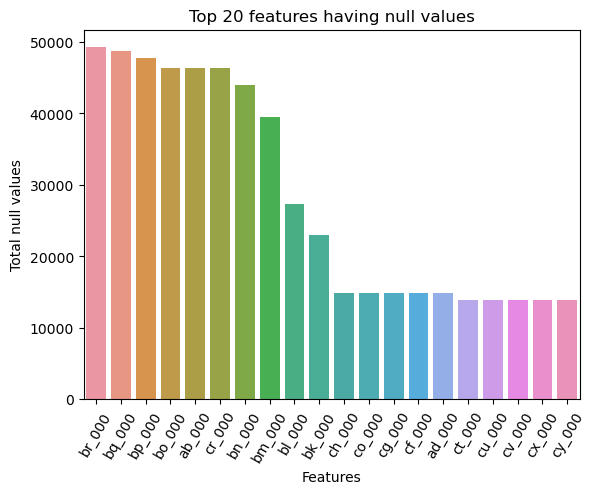

In [36]:
#plotting the top features having nulls

plt.figure()
sns.barplot(y= null_20_columns, x=null_20_columns.index)
plt.xticks(rotation=60)
plt.ylabel("Total null values")
plt.xlabel("Features")
plt.title("Top 20 features having null values")
plt.show()

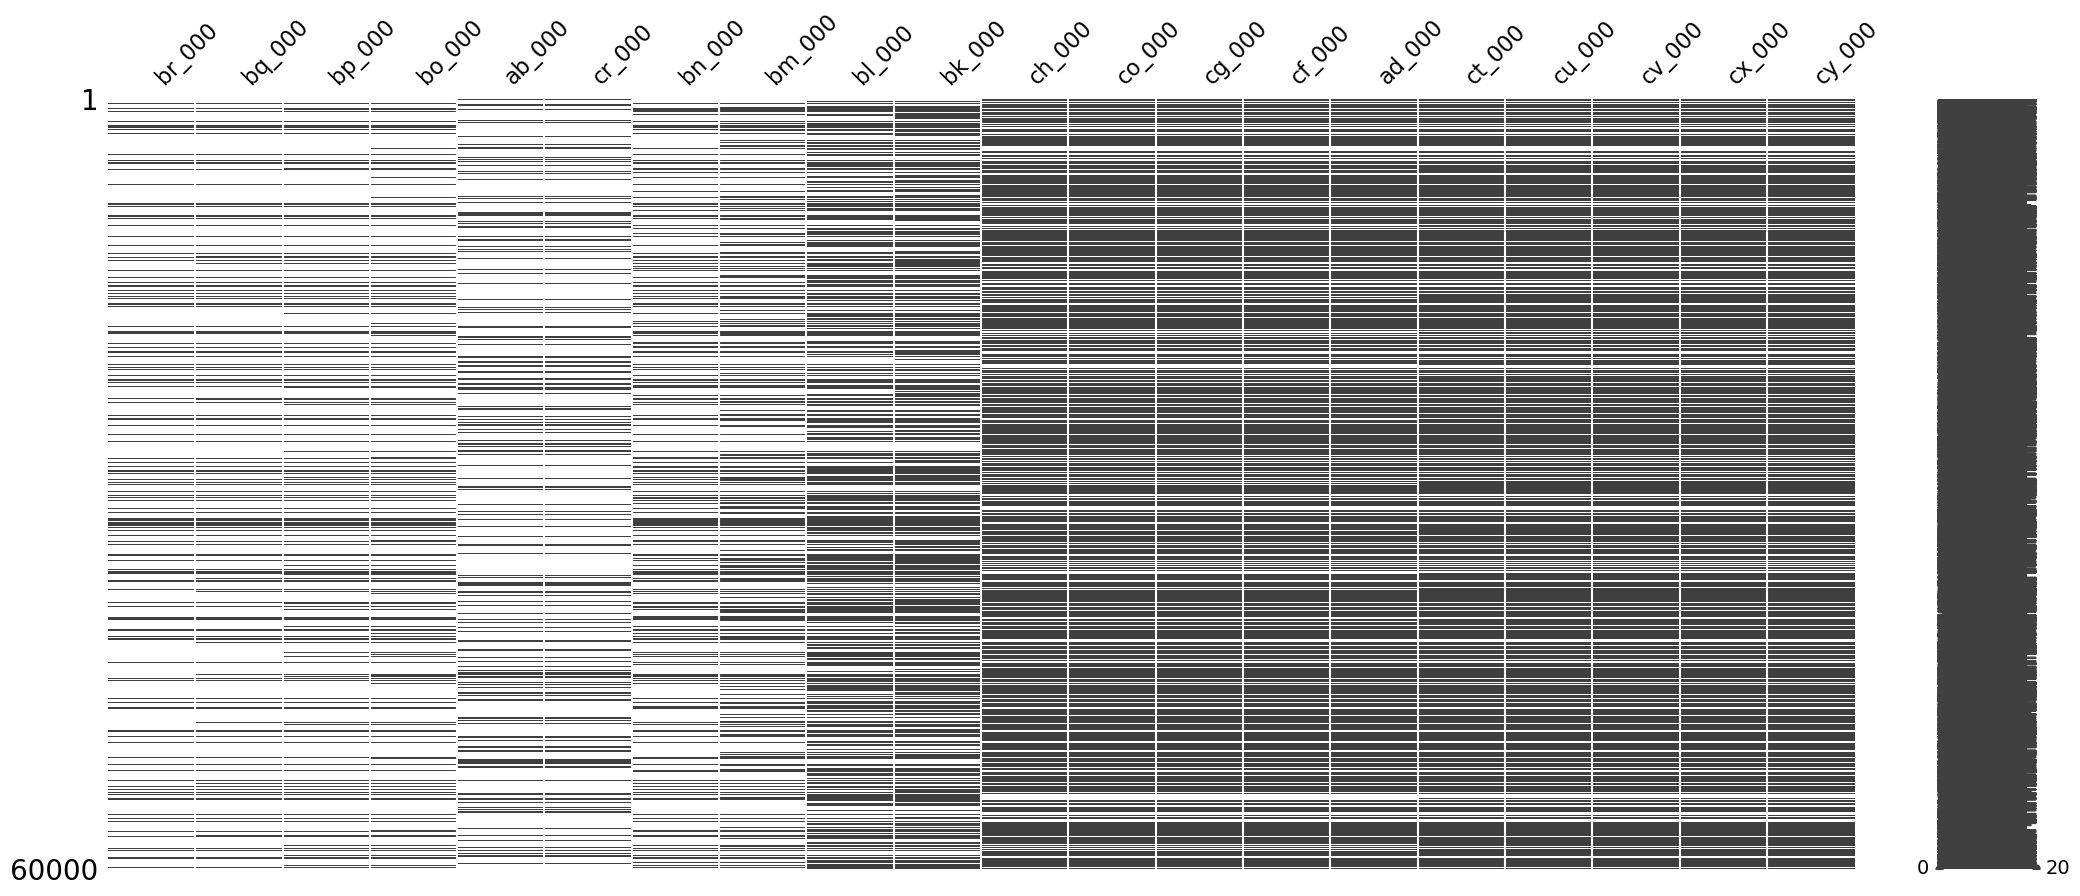

In [37]:
import missingno as msno

ax = msno.matrix(new_dataset[null_20_columns.index])

In [38]:
new_dataset = new_dataset.drop(columns = null_20_columns.index)

In [39]:
new_dataset.shape

(60000, 151)

##### sparse data check is performed first to determine which scale method will be applied

In [40]:
# Calculating the sparsity of the data

from numpy import count_nonzero

sparsity_of_dataset = 1 - count_nonzero(new_dataset) / new_dataset.size
sparsity_of_dataset

0.3474562913907284

##### 'new_dataset' has %34 sparsity of data 

In [41]:
# Confirming if data is sparse

from scipy import sparse

sparse.issparse(new_dataset)

False

## Scale the data

<Axes: xlabel='ee_005', ylabel='Count'>

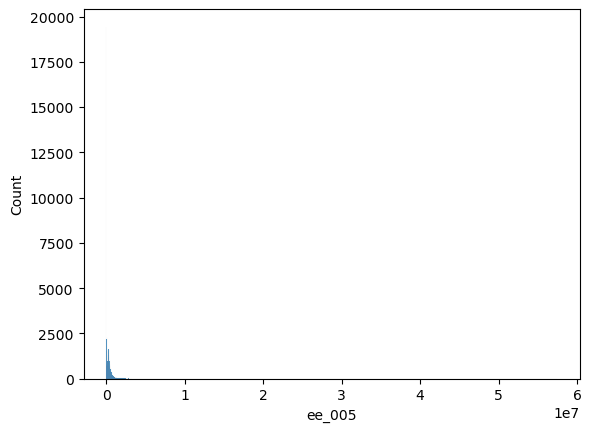

In [42]:
sns.histplot(data = new_dataset, x="ee_005")

In [43]:
# Assigning the independet variables to a new variable X

X = new_dataset.drop("class", axis = 1)

# Assigning the dependent variable to a new variable y

y = new_dataset["class"]

### Applying the MinMax method
The MinMax method was applied because when the dataset is checked, it looks like skewed data

In [44]:
import sklearn.preprocessing as preproc

X = preproc.MinMaxScaler().fit_transform(X)
new_dataset_scaled = pd.DataFrame(X)
new_dataset_scaled.values

array([[2.79250729e-02, 9.99999832e-01, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.20361295e-02, 0.00000000e+00, 0.00000000e+00, ...,
        3.93692728e-04, 0.00000000e+00, 0.00000000e+00],
       [1.49423061e-02, 1.07006746e-07, 0.00000000e+00, ...,
        1.34905375e-04, 0.00000000e+00, 0.00000000e+00],
       ...,
       [4.07782233e-05, 9.99999829e-01, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [2.92336170e-02, 9.99999829e-01, 0.00000000e+00, ...,
        1.01945944e-01, 0.00000000e+00, 0.00000000e+00],
       [1.46444794e-02, 3.27590826e-07, 0.00000000e+00, ...,
        4.14689673e-05, 0.00000000e+00, 0.00000000e+00]])

In [45]:
new_dataset_scaled.head()

,0,1,2,3,4,5,6,7,8,9,...,140,141,142,143,144,145,146,147,148,149
0,0.027925,9.999998e-01,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000163,0.007996,...,0.015918,0.013067,7.421784e-03,8.179508e-03,1.073013e-02,0.001321,0.003800,0.000000,0.000000,0.000000
1,0.012036,0.000000e+00,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000080,0.003646,...,0.005407,0.004716,3.019031e-03,4.272917e-03,4.228511e-03,0.000679,0.005064,0.000394,0.000000,0.000000
2,0.014942,1.070067e-07,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000007,0.002068,...,0.003559,0.004232,4.364196e-03,7.130884e-03,1.014768e-02,0.001321,0.004937,0.000135,0.000000,0.000000
3,0.000004,3.285295e-08,0.0,0.000498,0.0,0.0,0.0,0.000005,0.000010,0.000018,...,0.000003,0.000001,5.970003e-07,7.660803e-07,3.163775e-07,0.000000,0.000000,0.000000,0.008299,0.027923
4,0.022164,6.420405e-07,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000191,0.010975,...,0.007981,0.006086,4.171776e-03,6.044861e-03,9.078578e-03,0.002605,0.022523,0.000320,0.000000,0.000000


In [50]:
new_dataset_scaled.isnull().sum()

0         0
1      3335
2      2500
3      2500
4       671
       ... 
145     671
146     671
147     671
148    2724
149    2723
Length: 150, dtype: int64

In [53]:
new_dataset_scaled.fillna(new_dataset_scaled.mean(), inplace=True)

In [54]:
new_dataset_scaled.isnull().sum()

0      0
1      0
2      0
3      0
4      0
      ..
145    0
146    0
147    0
148    0
149    0
Length: 150, dtype: int64

In [55]:
new_dataset_scaled.describe()

,0,1,2,3,4,5,6,7,8,9,...,140,141,142,143,144,145,146,147,148,149
count,60000.000000,6.000000e+04,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,...,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,6.000000e+04,60000.000000,60000.000000,60000.000000,60000.000000
mean,0.021604,1.670874e-01,0.000324,0.000548,0.000066,0.000237,0.000816,0.001397,0.001910,0.006186,...,0.005716,0.005592,0.004588,0.006859,0.010537,2.895728e-03,0.007200,0.002202,0.000188,0.000186
std,0.052950,3.625407e-01,0.007513,0.010233,0.006030,0.008276,0.014165,0.011947,0.010318,0.018106,...,0.014744,0.014309,0.011958,0.019409,0.033636,1.437000e-02,0.023199,0.012389,0.008856,0.007529
min,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,0.000304,9.386557e-09,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000001,0.000080,...,0.000039,0.000032,0.000029,0.000067,0.000018,9.867862e-07,0.000000,0.000000,0.000000,0.000000
50%,0.011205,8.823363e-08,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000017,0.001034,...,0.003076,0.003042,0.002350,0.003414,0.003156,3.645004e-04,0.000232,0.000000,0.000000,0.000000
75%,0.017720,7.912867e-07,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000234,0.005331,...,0.005716,0.005732,0.004760,0.006970,0.008964,1.448606e-03,0.007200,0.000621,0.000000,0.000000
max,1.000000,1.000000e+00,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000e+00,1.000000,1.000000,1.000000,1.000000


Text(25.09722222222222, 0.5, 'Number of articles')

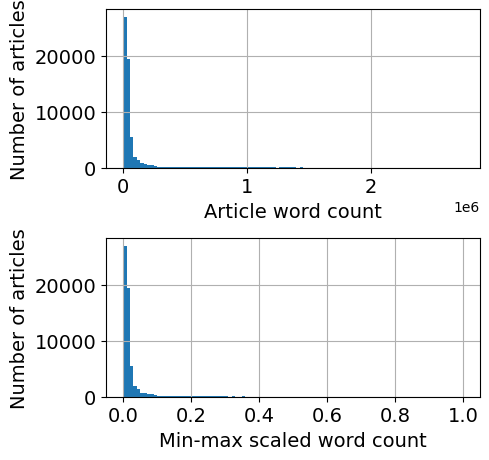

In [66]:
fig, (ax1, ax2) = plt.subplots(2,1,figsize=(5, 5))
fig.tight_layout(pad=3.0)
new_dataset['aa_000'].hist(ax=ax1, bins=100)
ax1.tick_params(labelsize=14)
ax1.set_xlabel('Article word count', fontsize=14)
ax1.set_ylabel('Number of articles', fontsize=14)

new_dataset_scaled[0].hist(ax=ax2, bins=100)
ax2.tick_params(labelsize=14)
ax2.set_xlabel('Min-max scaled word count', fontsize=14)
ax2.set_ylabel('Number of articles', fontsize=14)

In [68]:
new_dataset_scaled.head(-5)

,0,1,2,3,4,5,6,7,8,9,...,140,141,142,143,144,145,146,147,148,149
0,0.027925,9.999998e-01,0.0,0.000000,0.0,0.0,0.0,0.000000,1.627842e-04,0.007996,...,0.015918,0.013067,7.421784e-03,8.179508e-03,1.073013e-02,0.001321,0.003800,0.000000,0.000000,0.000000
1,0.012036,0.000000e+00,0.0,0.000000,0.0,0.0,0.0,0.000000,7.977081e-05,0.003646,...,0.005407,0.004716,3.019031e-03,4.272917e-03,4.228511e-03,0.000679,0.005064,0.000394,0.000000,0.000000
2,0.014942,1.070067e-07,0.0,0.000000,0.0,0.0,0.0,0.000000,7.201835e-06,0.002068,...,0.003559,0.004232,4.364196e-03,7.130884e-03,1.014768e-02,0.001321,0.004937,0.000135,0.000000,0.000000
3,0.000004,3.285295e-08,0.0,0.000498,0.0,0.0,0.0,0.000005,9.666541e-06,0.000018,...,0.000003,0.000001,5.970003e-07,7.660803e-07,3.163775e-07,0.000000,0.000000,0.000000,0.008299,0.027923
4,0.022164,6.420405e-07,0.0,0.000000,0.0,0.0,0.0,0.000000,1.911982e-04,0.010975,...,0.007981,0.006086,4.171776e-03,6.044861e-03,9.078578e-03,0.002605,0.022523,0.000320,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59990,0.029620,9.999998e-01,0.0,0.000000,0.0,0.0,0.0,0.000000,2.711176e-04,0.007818,...,0.008053,0.009959,9.591407e-03,1.802441e-02,2.134365e-02,0.001349,0.000170,0.000000,0.000000,0.000000
59991,0.014312,2.121362e-07,0.0,0.000000,0.0,0.0,0.0,0.000000,1.557484e-05,0.007118,...,0.004009,0.004282,3.329183e-03,5.090081e-03,7.912980e-03,0.001318,0.012193,0.002495,0.000000,0.000000
59992,0.000005,9.386557e-10,0.0,0.000000,0.0,0.0,0.0,0.000006,1.430753e-05,0.000003,...,0.000002,0.000001,8.234487e-07,9.053676e-07,1.708438e-06,0.000000,0.000000,0.000000,0.000000,0.000000
59993,0.000000,0.000000e+00,0.0,0.000000,0.0,0.0,0.0,0.000000,6.118064e-08,0.000010,...,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000


### implementation PCA

Squeezin the fetures by applying the PCA method to save work

In [69]:
from sklearn.decomposition import PCA

Text(0, 0.5, 'cumulative explained variance')

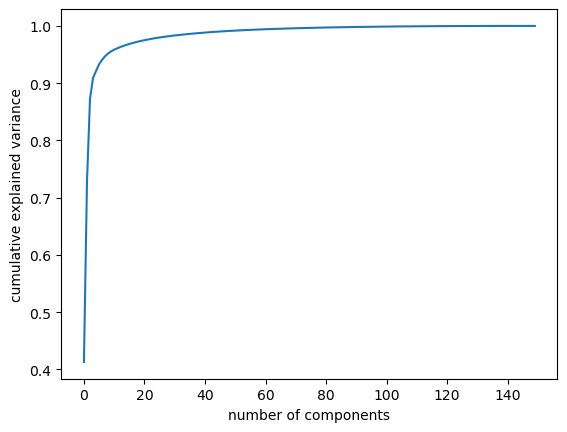

In [74]:
# y = new_dataset["class"]

pca = PCA().fit(new_dataset_scaled)

plt.plot(np.cumsum(pca.explained_variance_ratio_))

plt.xlabel("number of components")
plt.ylabel("cumulative explained variance")

In [75]:
pca = PCA(32)
projected = pca.fit_transform(new_dataset_scaled)

In [76]:
projected.shape

(60000, 32)

In [77]:
pca.explained_variance_

array([0.1722591 , 0.13100662, 0.06067366, 0.0151388 , 0.00515483,
       0.00479317, 0.00330174, 0.00268394, 0.00192777, 0.00155975,
       0.00123566, 0.00099661, 0.00091262, 0.00081363, 0.00073546,
       0.00070135, 0.00062579, 0.00060639, 0.0005369 , 0.00050641,
       0.00047282, 0.00043803, 0.00042686, 0.00039389, 0.00036507,
       0.00033401, 0.00032573, 0.00030264, 0.0002972 , 0.00029071,
       0.00025637, 0.00025346])

In [78]:
new_dataset_pca = pd.DataFrame(projected, columns = ['C1','C2','C3','C4','C5','C6','C7','C8','C9','C10',
                                                     'C11','C12','C13','C14','C15','C16','C17','C18','C19','C20',
                                                     'C21','C22','C23','C24','C25','C26','C27','C28','C29','C30',
                                                    'C31','C32'])

In [79]:
new_dataset_pca.head()

,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,...,C23,C24,C25,C26,C27,C28,C29,C30,C31,C32
0,0.351354,0.794368,0.070386,-0.050889,0.014118,-0.048093,-0.029631,0.039877,-0.038603,-0.014275,...,-0.001441,-0.004800,-0.016232,0.007544,-0.001064,-0.012707,0.002811,0.007925,0.012509,0.004696
1,0.150689,-0.179668,-0.120158,0.684540,0.002570,0.045357,-0.014913,0.024026,-0.032767,-0.006341,...,0.006300,0.000896,-0.000989,-0.004069,0.000070,-0.001080,-0.005655,0.002936,-0.006114,-0.002118
2,-0.218208,-0.140805,-0.007318,-0.005689,0.005515,-0.013407,-0.002261,-0.018928,0.014779,0.005775,...,-0.000421,0.001930,-0.005322,0.005448,-0.000407,-0.002811,0.006232,0.000652,-0.003098,0.000729
3,-0.479127,-0.107651,-0.027144,-0.007537,-0.000466,0.008059,-0.000029,0.000602,-0.001379,0.002170,...,-0.000576,0.000244,0.000581,0.000968,0.000849,-0.000686,0.001078,-0.000759,0.002589,0.000080
4,0.265292,-0.199393,-0.054712,-0.019228,-0.003152,-0.017237,-0.013718,0.029684,-0.055941,-0.005172,...,-0.000619,0.017285,-0.000547,-0.010025,-0.000515,-0.000801,-0.014180,0.001774,0.002682,0.008264


In [80]:
new_dataset_pca['class'] = y

In [84]:
new_dataset_pca.head()

,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,...,C24,C25,C26,C27,C28,C29,C30,C31,C32,class
0,0.351354,0.794368,0.070386,-0.050889,0.014118,-0.048093,-0.029631,0.039877,-0.038603,-0.014275,...,-0.004800,-0.016232,0.007544,-0.001064,-0.012707,0.002811,0.007925,0.012509,0.004696,0
1,0.150689,-0.179668,-0.120158,0.684540,0.002570,0.045357,-0.014913,0.024026,-0.032767,-0.006341,...,0.000896,-0.000989,-0.004069,0.000070,-0.001080,-0.005655,0.002936,-0.006114,-0.002118,0
2,-0.218208,-0.140805,-0.007318,-0.005689,0.005515,-0.013407,-0.002261,-0.018928,0.014779,0.005775,...,0.001930,-0.005322,0.005448,-0.000407,-0.002811,0.006232,0.000652,-0.003098,0.000729,0
3,-0.479127,-0.107651,-0.027144,-0.007537,-0.000466,0.008059,-0.000029,0.000602,-0.001379,0.002170,...,0.000244,0.000581,0.000968,0.000849,-0.000686,0.001078,-0.000759,0.002589,0.000080,0
4,0.265292,-0.199393,-0.054712,-0.019228,-0.003152,-0.017237,-0.013718,0.029684,-0.055941,-0.005172,...,0.017285,-0.000547,-0.010025,-0.000515,-0.000801,-0.014180,0.001774,0.002682,0.008264,0


In [85]:
new_dataset_array = new_dataset_pca.values

## Machine Learning for Dataset

In [89]:
from sklearn.model_selection import train_test_split

X = new_dataset_array[:,0:32]
y = new_dataset_array[:,32]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)

In [90]:
from matplotlib import pyplot
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC

### ML Model Decision

Getting cross valudation score for each model and decide the model

In [92]:
models=[]
models.append(('LR', LogisticRegression(solver='liblinear',multi_class='ovr')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))

In [93]:
results = []
names = []
for name, model in models:
    kflod = StratifiedKFold(n_splits=2, random_state=1, shuffle=True)
    cv_results = cross_val_score(model, X_train, y_train, cv=kflod, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    print('%s: %f (%f)' % (name,cv_results.mean(), cv_results.std()))

LR: 0.986938 (0.000063)
LDA: 0.987313 (0.000479)
KNN: 0.987437 (0.000396)
CART: 0.984021 (0.000188)
NB: 0.962896 (0.000646)
SVM: 0.984813 (0.000146)


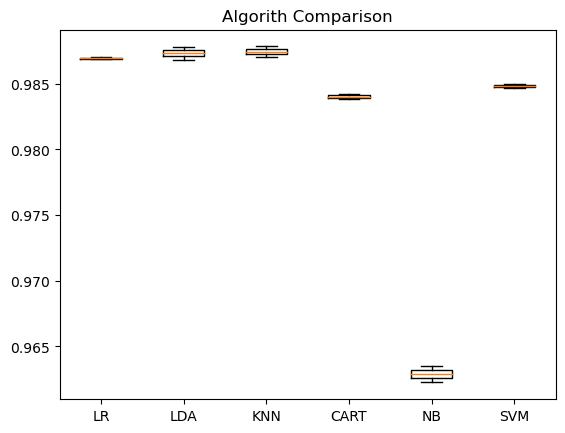

In [94]:
pyplot.boxplot(results, labels=names)
pyplot.title('Algorith Comparison')
pyplot.show()

In [95]:
model = LogisticRegression(solver='liblinear',multi_class='ovr')
model.fit(X_train, y_train)
predictions = model.predict(X_test)

In [96]:
print(accuracy_score(y_test, predictions))
print(confusion_matrix(y_test, predictions))

0.9885
[[11778    31]
 [  107    84]]


### Visualize score
note: 0 = neg, 1 = pos

In [100]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

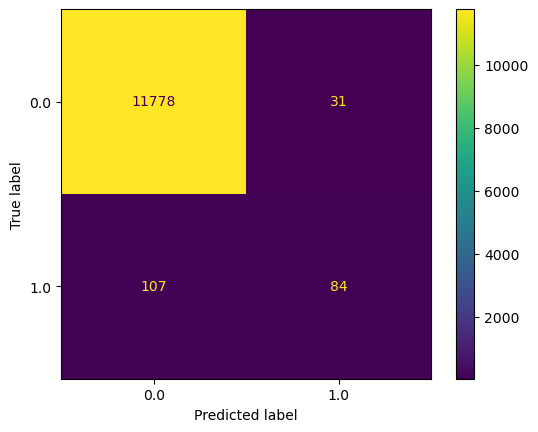

In [101]:
y_pred = model.predict(X_test)
cm = confusion_matrix(y_test, predictions, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=model.classes_)
disp.plot()
plt.show()

# Conclusion

In this analysis, dimensionality reduction techniques were employed to handle high-dimensional data, utilizing data cleaning, scaling methods, and PCA (Principal Component Analysis), without applying machine learning techniques to prepare the dataset.

"The Curse of Dimensionality" is a concept in data analysis and machine learning that addresses the difficulties and limitations that arise when dealing with high-dimensional data. In simpler terms, it refers to the challenges that occur as the number of features or variables in a dataset significantly increases.(Jordan, Kleinberg and Schölkopf, 2006)

The curse of dimensionality was encountered in this data set. There is a major dimensional issue as there are 171 columns and 6000 rows in the dataset so the total size is 171x6000. This problem was overcome by using data clearing, scaling and PCA methods.

After using tools and techniques to clean the data and applying PCA, the dataset was reduced to 32 features, which is a significant reduction from its original size of 171 columns, amounting to an 80% reduction.

Even though PCA was applied after MinMax Scaling, the accuracy score showed a 20% difference post MinMax Scaling.

As a result, the obtained accuracy scores in this analysis approached 100%, with a deviation of 1.5 to 2 points, demonstrating that the applied methods yielded successful performance.



#### References

Shetty, B. (n.d.). Curse of Dimensionality. [online] Built In. Available at: https://builtin.com/data-science/curse-dimensionality.

Jordan, M., Kleinberg, J. and Schölkopf, B. (2006). Information Science and Statistics. [online] Available at: https://www.microsoft.com/en-us/research/uploads/prod/2006/01/Bishop-Pattern-Recognition-and-Machine-Learning-2006.pdf.